# Part II - (Communicate Data Findings)

by <b>(Chidozie Ahamefule)</b>

## Investigation Overview


>In this investigation I wanted to figure out two things:

The greatest aim and concern for Loan companies like Prosper, would be to give out loans to the right entities that would be able to pay back in good time.

Our main features would therefore be to be able to successfully predict and determine individuals/entities that would NOT default on their loan repayments schedule.


## Dataset Overview

> The Prosper loan dataset contains information on peer to peer loans facilitated by a credit company 'Prosper'. Our original dataset comprises of 113,937 rows of data & 81 columns.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
# To load in the Prosper dataset into a pandas dataframe, view the shape & column types, then print a sample
pld = pd.read_csv(r'C:\Users\Patrick\Downloads\Documents\prosperLoanData.csv')
print(pld.shape)
print(pld.dtypes)
pld.head(10)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [23]:
major_columns = ['ListingKey', 'LoanStatus', 'ClosedDate', 'Term', 'ProsperRating (Alpha)', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus',
'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations', 'Investors']

In [24]:
pld_col = pld[major_columns]

In [25]:
pld_col = pld_col.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [26]:
pld_col['TotalProsperLoans'] = pld_col['TotalProsperLoans'].fillna(0)

In [27]:
pld_col['LoanOriginationDate'] = pd.to_datetime(pld_col['LoanOriginationDate'])

In [28]:
pld_col['ClosedDate'] = pd.to_datetime(pld_col['ClosedDate'])

Visualization 1

In [29]:
# To make sure our ordinal ratings are maintained from AA TO HR
ordinal_ratings_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}
ordered_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_ratings_dict['ProsperRating (Alpha)'])
pld_col['ProsperRating (Alpha)'] = pld_col['ProsperRating (Alpha)'].astype(ordered_ratings)

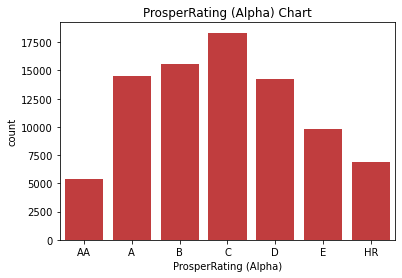

In [30]:
base_color = sb.color_palette()[3]
plt.xticks(rotation=0)
sb.countplot(data=pld_col, x='ProsperRating (Alpha)', color = base_color); 
plt.title("ProsperRating (Alpha) Chart");

Observations
1. According to the ratings as stipulated in the Prosper company data dictionary, (0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA), 7 - AA is the highest possible rating. From the univariate barchat above, ONLY about 5,000 Prosper customers fall into this category out of a possible 90,000. 

2. Also, the most frequent Prosper rating is the 'C' alphabet.

(Visualization 2)


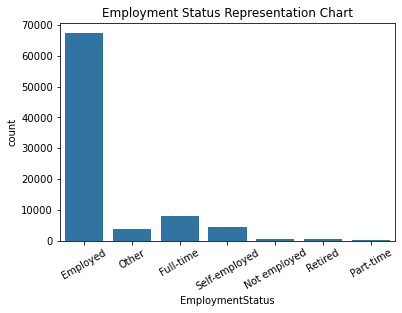

In [31]:
base_color = sb.color_palette()[0]
sb.countplot(data = pld_col, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 30);
plt.title("Employment Status Representation Chart");

Observation

A vast majority of Prosper Loanees are 'Employed'. This is a good sign.

(Visualization 3)

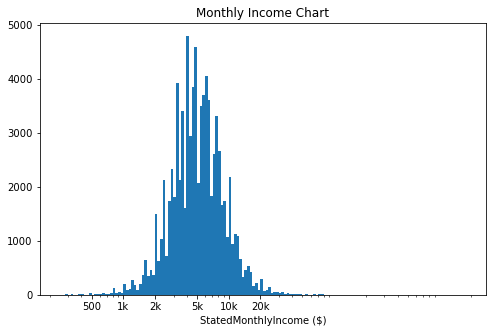

In [32]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(pld_col['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pld_col, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.title("Monthly Income Chart");
plt.show()

Observations - There are some massive outliers as seen from the histogram plotted above. Majority(if not all) of the loanees monthly income falls arond the 5,000 mark. This is obvious from the long tail(rightly skewed data) noticed in our histogram above. Also, a peak is observed around 2,000 and 5,000. 

The plot seems to be normally(Bell shaped) distributed. This means that the monthly income of Prosper Loan customers are Normally distributed.

Visualization 4

In [33]:
# Also to make sure our ordinal ratings are maintained from AA TO HR
ordinal_ratings_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}
ordered_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_ratings_dict['ProsperRating (Alpha)'])
pld_col['ProsperRating (Alpha)'] = pld_col['ProsperRating (Alpha)'].astype(ordered_ratings)

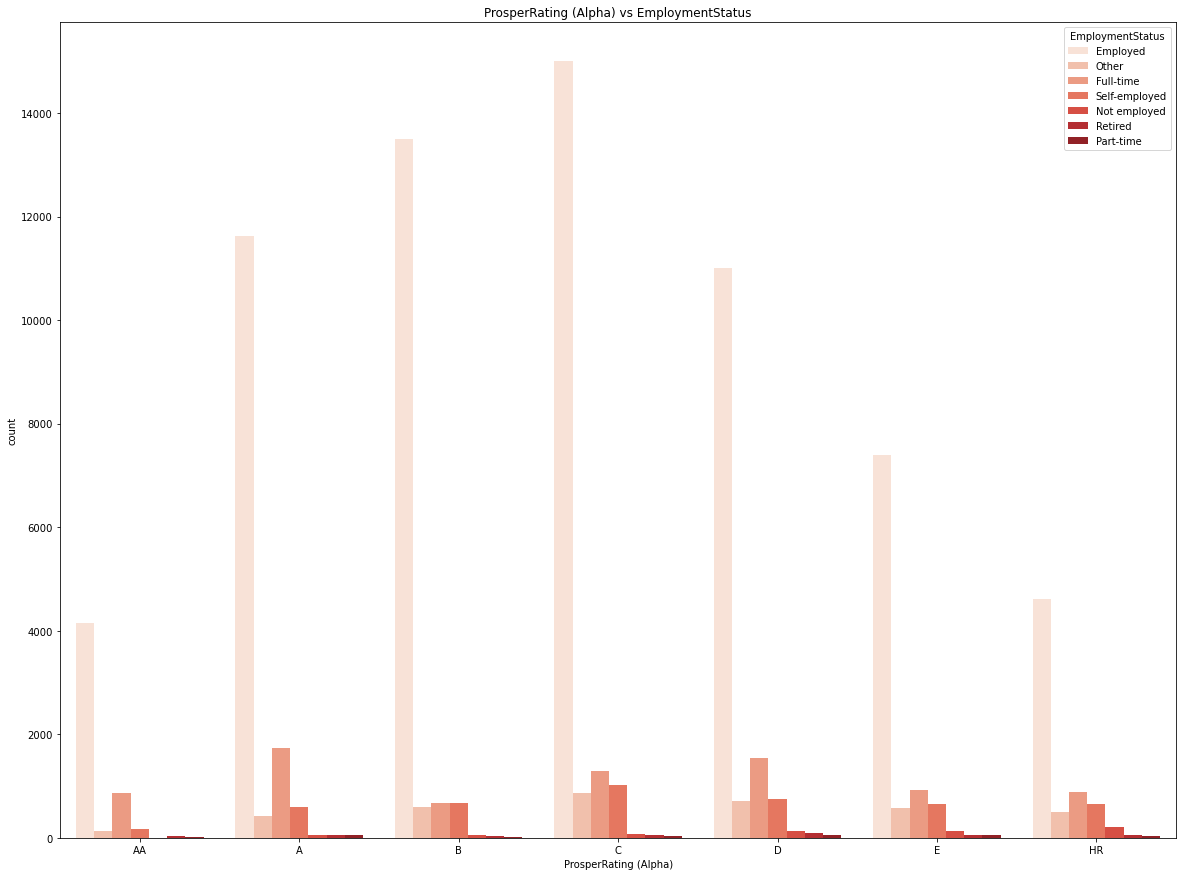

In [34]:
plt.figure(figsize = [20, 15])
sb.countplot(data = pld_col, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Reds');
plt.title("ProsperRating (Alpha) vs EmploymentStatus");

Observation: It is very obvious from the charts above, that a positive correlation exists between both variables.

The direct implication is that, an employed loanee is highly likely to pay back their loans.

Generate Slideshow
Once you're ready to generate your slideshow, use the jupyter nbconvert command to generate the HTML slide show.

In [35]:
# Use this command if you are running this file in local
!jupyter nbconvert PartII-SlideDeck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook PartII-SlideDeck.ipynb to slides
[NbConvertApp] Writing 660923 bytes to PartII-SlideDeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Patrick\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  